<a href="https://colab.research.google.com/github/kimheeseo/LDPC_study/blob/main/ML_LEC_34_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
!pip uninstall tensorflow

Found existing installation: tensorflow 1.15.0
Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
    /usr/local/lib/python3.7/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [73]:
!pip install tensorflow==1.15 # 1.15 버전 Tensorflow 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-1.15.0-cp37-cp37m-manylinux2010_x86_64.whl (412.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.


In [74]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [75]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

# read_data_sets() 를 통해 데이터를 객체형태로 받아오고
# one_hot 옵션을 통해 정답(label) 을 one-hot 인코딩된 형태로 받아옴

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# mnist 데이터 셋은 train, test, validation 3개의 데이터 셋으로 구성되어 있으며.
# num_examples 값을 통해 데이터의 갯수 확인 가능함

print("\n", mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

 55000 10000 5000


In [76]:
# 데이터는 784(28x28)개의 픽셀을 가지는 이미지와
# 10(0~9)개 클래스를 가지는 one-hot 인코딩된 레이블(정답)을 가지고 있음
print("train image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

train image shape =  (55000, 784)
train label shape =  (55000, 10)
test image shape =  (10000, 784)
test label shape =  (10000, 10)


In [77]:
# Hyper-Parameter
learning_rate = 0.001  # 학습율
epochs = 30            # 반복횟수
batch_size = 100      # 한번에 입력으로 주어지는 MNIST 개수

In [78]:
# 입력과 정답을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, 784])  

T = tf.placeholder(tf.float32, [None, 10])  

In [79]:
X

<tf.Tensor 'Placeholder_4:0' shape=(?, 784) dtype=float32>

1번째 컨볼루션층

In [80]:
# 입력층의 출력 값. 컨볼루션 연산을 위해 reshape 시킴
A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])   # image 28 X 28 X 1 (black/white)
# 1번째 컨볼루션 층
# 3X3 크기를 가지는 32개의 필터를 적용

F2 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))  
b2 = tf.Variable(tf.constant(0.1, shape=[32]))   

# 1번째 컨볼루션 연산을 통해 28 X 28 X1  => 28 X 28 X 32 
#입력값이 28*28*1이 되는 데, filter의 갯수가 32개이기에, 28*28*32가 됩니다.
C2 = tf.nn.conv2d(A1, F2, strides=[1, 1, 1, 1], padding='SAME')
#padding='SAME'에 의해서, 32이 유지되고, stride값이 1이기에, 28*28이 됩니다.
#따라서 아래와 같이 C2의 shape은 28*28*32가 됩니다.

# relu
Z2 = tf.nn.relu(C2+b2)

# 1번째 max pooling을 통해 28 X 28 X 32  => 14 X 14 X 32 
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#A2 전까지인 Z2의 경우, 28*28*32였는데, 여기에서 stride값이 2이기 때문에 1/2이 되어서, 14*14*32가 됩니다.

In [81]:
C2

<tf.Tensor 'Conv2D_3:0' shape=(?, 28, 28, 32) dtype=float32>

In [82]:
Z2

<tf.Tensor 'Relu_3:0' shape=(?, 28, 28, 32) dtype=float32>

In [83]:
A2

<tf.Tensor 'MaxPool_3:0' shape=(?, 14, 14, 32) dtype=float32>

2번째 컨볼루션 층

In [84]:
# 2번째 컨볼루션 층
F3 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))  
b3 = tf.Variable(tf.constant(0.1, shape=[64]))   

# 2번째 컨볼루션 연산을 통해 14 X 14 X 32 => 14 X 14 X 64 
C3 = tf.nn.conv2d(A2, F3, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z3 = tf.nn.relu(C3+b3)

# 2번째 max pooling을 통해 14 X 14 X 64 => 7 X 7 X 64
A3 = P3 = tf.nn.max_pool(Z3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [85]:
F3
#3*3*32*64는 3*3 크기의 filter를 의미하고, 64는 filter의 갯수를 의미하고, 32는 입력채널
#입력 채널 : 데이터가 들어오는 통로

<tf.Variable 'Variable_14:0' shape=(3, 3, 32, 64) dtype=float32_ref>

In [86]:
C3
#14*14*32 -> 14*14*64인데, 우선 padding='SAME'에 의해서, 14*14가 되고,
#filter의 갯수가 64이기에, 64가 되어서, 14*14*64가 됩니다.

<tf.Tensor 'Conv2D_4:0' shape=(?, 14, 14, 64) dtype=float32>

In [87]:
Z3

<tf.Tensor 'Relu_4:0' shape=(?, 14, 14, 64) dtype=float32>

In [88]:
A3
#원래는 14*14*64 -> 7*7*64인데, 여기서 stride가 2이기 때문에, 14->7로 1/2이 됩니다.

<tf.Tensor 'MaxPool_4:0' shape=(?, 7, 7, 64) dtype=float32>

3번째 컨볼루션층

In [89]:
# 3번째 컨볼루션 층
F4 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))  
b4 = tf.Variable(tf.constant(0.1, shape=[128]))   

# 3번째 컨볼루션 연산을 통해 7 X 7 X 64 => 7 X 7 X 128
C4 = tf.nn.conv2d(A3, F4, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z4 = tf.nn.relu(C4+b4)

# 3번째 max pooling을 통해 7 X 7 X 128 => 4 X 4 X 128
A4 = P4 = tf.nn.max_pool(Z4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [90]:
F4
#(3,3,64,128)이 filter인데, 3*3이 필터의 크기를 나타내고,
#128은 필터의 갯수를 나타내고, 64는 입력채널의 수를 나타냅니다.

<tf.Variable 'Variable_16:0' shape=(3, 3, 64, 128) dtype=float32_ref>

In [91]:
C4
#7*7*64 -> 7*7*128 여기에서 padding='SAME'에 의해서 7*7이 되고,
#64->128이 되는 이유는 F4에서 filter의 갯수를 통해, '128'이 된다는 것을 알 수 있습니다.

<tf.Tensor 'Conv2D_5:0' shape=(?, 7, 7, 128) dtype=float32>

In [92]:
A4
#7*7*128 -> 4*4*128이 되는 이유는 stride=2에 의해서 7/2=4로 (4,4,128)이 됩니다.

<tf.Tensor 'MaxPool_5:0' shape=(?, 4, 4, 128) dtype=float32>

In [93]:
# 4X4 크기를 가진 128개의 activation map을 flatten 시킴
A4_flat = P4_flat = tf.reshape(A4, [-1, 128*4*4])
# 출력층
W5 = tf.Variable(tf.random_normal([128*4*4, 10], stddev=0.01))
b5 = tf.Variable(tf.random_normal([10]))

# 출력층 선형회귀  값 Z5, 즉 softmax 에 들어가는 입력 값
Z5 = logits = tf.matmul(A4_flat, W5) + b5    # 선형회귀 값 Z5

y = A5 = tf.nn.softmax(Z5)
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z5, labels=T) )

In [94]:
A4

<tf.Tensor 'MaxPool_5:0' shape=(?, 4, 4, 128) dtype=float32>

In [95]:
A4_flat
#A4의 경우, 4*4*128 -> A4_flat의 경우, 2048이 되는데, 이를 통해 1차원이 된 flat이 된 것을 확인할 수 있습니다.

<tf.Tensor 'Reshape_5:0' shape=(?, 2048) dtype=float32>

In [96]:
W5

<tf.Variable 'Variable_18:0' shape=(2048, 10) dtype=float32_ref>

In [97]:
y
#y의 경우 10이 되는 이유는 0~9로 softmax가 된 값이 출력되기 때문.

<tf.Tensor 'Softmax_3:0' shape=(?, 10) dtype=float32>

In [98]:
Z5

<tf.Tensor 'add_9:0' shape=(?, 10) dtype=float32>

In [99]:
loss

<tf.Tensor 'Mean_7:0' shape=() dtype=float32>

In [100]:
optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)  
# batch_size X 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal( tf.argmax(A5, 1), tf.argmax(T, 1) )

# batch_size X 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

In [101]:
print("optimizer", optimizer,"\n")
predicted_val

optimizer <tensorflow.python.training.adam.AdamOptimizer object at 0x7fd619eb2a50> 



<tf.Tensor 'Equal_4:0' shape=(?,) dtype=bool>

In [102]:
print("tf.argmax(A5,1)",tf.argmax(A5, 1),"\n")
print("tf.argmax(T,1)",tf.argmax(T, 1))

tf.argmax(A5,1) Tensor("ArgMax_16:0", shape=(?,), dtype=int64) 

tf.argmax(T,1) Tensor("ArgMax_17:0", shape=(?,), dtype=int64)


In [103]:
tf.cast(predicted_val, dtype=tf.float32)

<tf.Tensor 'Cast_7:0' shape=(?,) dtype=float32>

In [117]:
with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  # 변수 노드(tf.Variable) 초기화
    
    start_time = datetime.now()#학습경과 시간
    
    for i in range(epochs):    # 30 번 반복수행
        
        total_batch = int(mnist.train.num_examples / batch_size)  # 55,000 / 100

        for step in range(total_batch):
            
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
      
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})    
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    end_time = datetime.now() 
    
    print("\nelapsed time = ", end_time - start_time) 
    
    # Accuracy 확인
    test_x_data = mnist.test.images    # 10000 X 784
    test_t_data = mnist.test.labels    # 10000 X 10
    
    accuracy_val = sess.run(accuracy, feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  2.7656915
epochs =  0 , step =  100 , loss_val =  2.2911062
epochs =  0 , step =  200 , loss_val =  0.32244477
epochs =  0 , step =  300 , loss_val =  0.29068494
epochs =  0 , step =  400 , loss_val =  0.49716103
epochs =  0 , step =  500 , loss_val =  0.22872306
epochs =  1 , step =  0 , loss_val =  0.17914087
epochs =  1 , step =  100 , loss_val =  0.048879962
epochs =  1 , step =  200 , loss_val =  0.110925026
epochs =  1 , step =  300 , loss_val =  0.12997532
epochs =  1 , step =  400 , loss_val =  0.07831758
epochs =  1 , step =  500 , loss_val =  0.0711055
epochs =  2 , step =  0 , loss_val =  0.09930856
epochs =  2 , step =  100 , loss_val =  0.029170342
epochs =  2 , step =  200 , loss_val =  0.0364971
epochs =  2 , step =  300 , loss_val =  0.056734797
epochs =  2 , step =  400 , loss_val =  0.025782797
epochs =  2 , step =  500 , loss_val =  0.026704539
epochs =  3 , step =  0 , loss_val =  0.007075724
epochs =  3 , step =  100 , loss_val

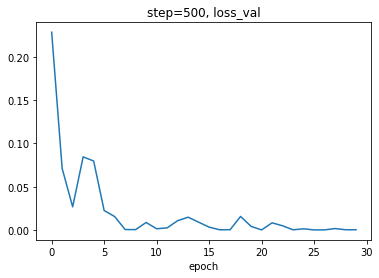

In [121]:
import matplotlib.pyplot as plt
plt.title('step=500, loss_val')
plt.xlabel('epoch')
x=[0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
y=[0.22872306, 0.0711055, 0.026704539, 0.084546305, 0.0797349, 0.022435214, 0.015496594, 0.0004320457, 0.00034164535, 0.008609741, 0.0013579428, 0.0023571874, 0.010643303, 0.014714111, 0.008959875, 0.003225814, 0.00018716908, 0.00023837881, 0.015593563, 0.0040920773, 1.9609458e-06, 0.008189256, 0.004793396, 0.00012504276, 0.0012940625, 3.605533e-06, 3.3483822e-05, 0.0015814654, 0.00018977548, 0.000200418]
plt.plot(x,y)